<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Larissa Gouveia de Carvalho*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [32]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 14.6MB/s]


In [33]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [ ]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

In [67]:
# bibliotecas necessárias
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
# Verificando os tipos de dados e valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data                             60 non-null     object 
 1   Visitantes Únicos                60 non-null     float64
 2   Sessões                          60 non-null     float64
 3   Taxa de Rejeição (%)             60 non-null     float64
 4   Páginas por Sessão               60 non-null     float64
 5   Principais Origens do Tráfego    60 non-null     object 
 6   Dispositivos                     60 non-null     object 
 7   Eventos                          60 non-null     int64  
 8   Taxa de Conversão (%)            60 non-null     float64
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.8+ KB
None


In [36]:
df['Data'] = pd.to_datetime(df['Data'])

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Data                             60 non-null     datetime64[ns]
 1   Visitantes Únicos                60 non-null     float64       
 2   Sessões                          60 non-null     float64       
 3   Taxa de Rejeição (%)             60 non-null     float64       
 4   Páginas por Sessão               60 non-null     float64       
 5   Principais Origens do Tráfego    60 non-null     object        
 6   Dispositivos                     60 non-null     object        
 7   Eventos                          60 non-null     int64         
 8   Taxa de Conversão (%)            60 non-null     float64       
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usa

In [38]:
print(df.describe())

                      Data  Visitantes Únicos     Sessões  \
count                   60          60.000000   60.000000   
mean   2023-01-30 12:00:00         301.133333  449.450000   
min    2023-01-01 00:00:00          90.000000  126.000000   
25%    2023-01-15 18:00:00         196.500000  298.750000   
50%    2023-01-30 12:00:00         319.500000  456.000000   
75%    2023-02-14 06:00:00         401.250000  616.000000   
max    2023-03-01 00:00:00         517.000000  769.000000   
std                    NaN         120.896295  182.619121   

       Taxa de Rejeição (%)  Páginas por Sessão    Eventos  \
count             60.000000           60.000000  60.000000   
mean              34.230939            4.007533   5.300000   
min               20.177732            1.834201   1.000000   
25%               24.860077            3.078881   3.750000   
50%               34.381987            4.027289   5.000000   
75%               43.013749            4.890745   6.250000   
max             

In [78]:
# Visualização das distribuições das variáveis
fig = make_subplots(rows=3, cols=3, subplot_titles=df.columns[1:])
for i, col in enumerate(df.columns[1:]):
    fig.add_trace(go.Histogram(x=df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(height=600, title_text="Distribuição das Variáveis")
fig.show()

In [41]:
# Gráfico de dispersão para relação entre visitantes únicos e taxa de conversão
scatter_fig = px.scatter(df, x='Visitantes Únicos', y='Taxa de Conversão (%)', title='Relação entre Visitantes Únicos e Taxa de Conversão')
scatter_fig.update_traces(marker=dict(size=10, opacity=0.5))
scatter_fig.show()

In [42]:
# Gráfico de linha para evolução temporal das métricas
line_fig = px.line(df, x='Data', y=['Visitantes Únicos', 'Sessões', 'Eventos'], title='Evolução Temporal das Métricas')
line_fig.update_xaxes(type='category')
line_fig.show()

In [43]:
# Gráfico de barras para comparar a origem do tráfego
bar_fig = px.bar(df, x='Principais Origens do Tráfego', y='Visitantes Únicos', title='Comparação de Visitantes por Origem do Tráfego')
bar_fig.show()

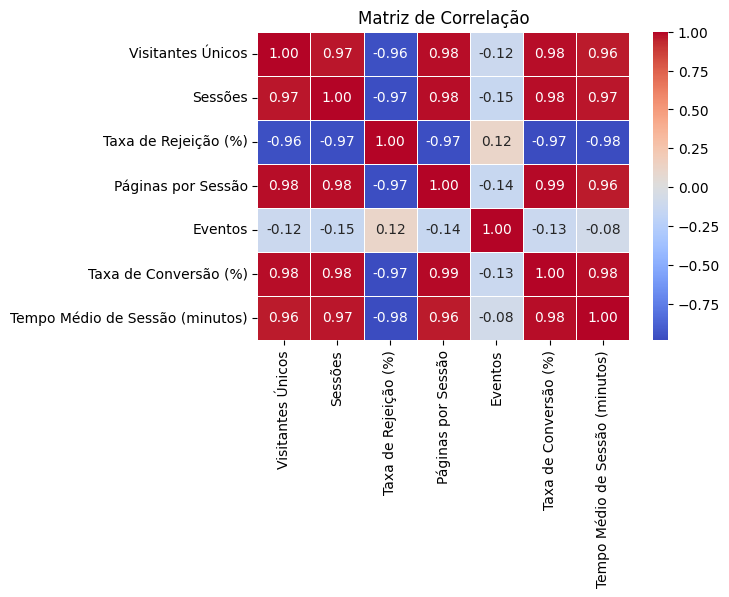

In [57]:
# Selecionar variáveis relevantes para a conversão de vendas
variaveis_relevantes = df[['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)', 'Páginas por Sessão',
                           'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']]

# Calcular a matriz de correlação
correlacao = variaveis_relevantes.corr()

# Gerar um mapa de calor da matriz de correlação
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [ ]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

In [58]:
df_simulacao = df[['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)', 'Páginas por Sessão', 'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']]

In [59]:
df_simulacao.head(5)

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,6,2.420236,5.835801


In [65]:
visitas_base = 10000  # Visitantes mensais antes do redesign
taxa_conversao_base = 0.02  # Taxa de conversão antes do redesign
aumento_visitas = 0.1  # Aumento percentual esperado nas visitas após o redesign
aumento_taxa_conversao = 0.005  # Aumento percentual esperado na taxa de conversão após o redesign
num_simulacoes = 1000  # Número de simulações a serem realizadas

# Função para simular o impacto do redesign
def simulacao_redesign(visitas_base, taxa_conversao_base, aumento_visitas, aumento_taxa_conversao):
    visitas_simuladas = visitas_base * (1 + aumento_visitas)
    taxa_conversao_simulada = taxa_conversao_base * (1 + aumento_taxa_conversao)
    vendas_simuladas = visitas_simuladas * taxa_conversao_simulada
    return vendas_simuladas, taxa_conversao_simulada

# Listas para armazenar os resultados de cada simulação
resultados_vendas = []
resultados_taxa_conversao = []

# Realizar as simulações
for _ in range(num_simulacoes):
    vendas_simuladas, taxa_conversao_simulada = simulacao_redesign(visitas_base, taxa_conversao_base, aumento_visitas, aumento_taxa_conversao)
    resultados_vendas.append(vendas_simuladas)
    resultados_taxa_conversao.append(taxa_conversao_simulada)

In [66]:
# Calcular estatísticas dos resultados
media_vendas = np.mean(resultados_vendas)
desvio_padrao_vendas = np.std(resultados_vendas)
media_taxa_conversao = np.mean(resultados_taxa_conversao)

# Imprimir resultados
print("Resultados da simulação de Monte Carlo:")
print("Média de vendas simuladas:", media_vendas)
print("Desvio padrão das vendas simuladas:", desvio_padrao_vendas)
print("Média da taxa de conversão simulada:", media_taxa_conversao)

Resultados da simulação de Monte Carlo:
Média de vendas simuladas: 221.09999999999994
Desvio padrão das vendas simuladas: 5.684341886080802e-14
Média da taxa de conversão simulada: 0.0201


### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [ ]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleciona a variável de entrada (X) e a variável de saída (y)
X = df[['Visitantes Únicos']]
y = df['Taxa de Conversão (%)']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e treina o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcula o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
print('Erro Quadrático Médio:', mse)

# Coeficiente de regressão
coef = model.coef_[0]
print('Coeficiente de Regressão:', coef)

# Interceptar
intercept = model.intercept_
print('Interceptação:', intercept)

Erro Quadrático Médio: 0.06209301094804356
Coeficiente de Regressão: 0.012185919363003643
Interceptação: 0.8324853896236939


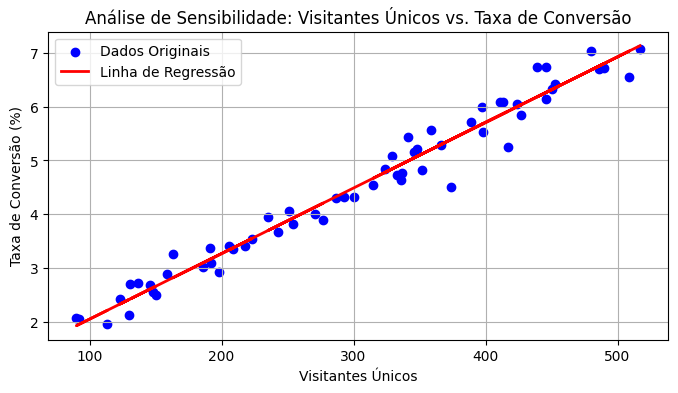

In [79]:
import numpy as np

# Calcula as previsões para todos os dados
y_pred_all = model.predict(X)

# Plota o gráfico de dispersão e a linha de regressão
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Dados Originais')
plt.plot(X, y_pred_all, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Visitantes Únicos')
plt.ylabel('Taxa de Conversão (%)')
plt.title('Análise de Sensibilidade: Visitantes Únicos vs. Taxa de Conversão')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



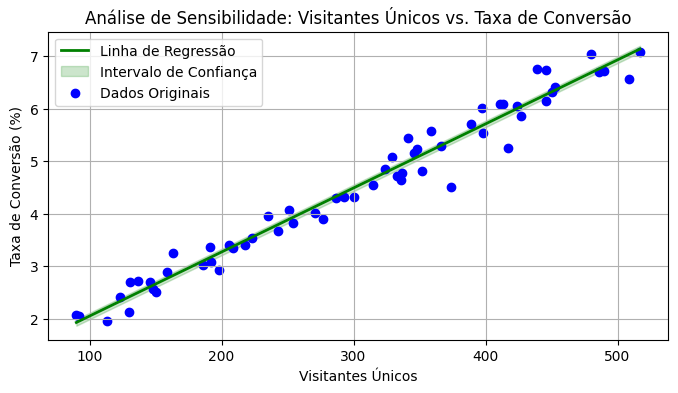

In [80]:
# Criar uma série de valores para os visitantes únicos
unique_visitors_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Fazer previsões para esses valores
predicted_conversion_rate = model.predict(unique_visitors_range)

# Plotar o gráfico de sensibilidade
plt.figure(figsize=(8, 4))
plt.plot(unique_visitors_range, predicted_conversion_rate, color='green', linewidth=2)
plt.fill_between(unique_visitors_range.flatten(), predicted_conversion_rate - mse, predicted_conversion_rate + mse, color='green', alpha=0.2)
plt.scatter(X, y, color='blue', label='Dados Originais')
plt.xlabel('Visitantes Únicos')
plt.ylabel('Taxa de Conversão (%)')
plt.title('Análise de Sensibilidade: Visitantes Únicos vs. Taxa de Conversão')
plt.legend(['Linha de Regressão', 'Intervalo de Confiança', 'Dados Originais'])
plt.grid(True)
plt.show()

In [75]:
# Seleciona as variáveis de entrada (X) e a variável de saída (y)
X_sessoes = df[['Sessões']]
X_eventos = df[['Eventos']]

# Divide os dados em conjuntos de treinamento e teste
X_train_sessoes, X_test_sessoes, y_train, y_test = train_test_split(X_sessoes, y, test_size=0.2, random_state=42)
X_train_eventos, X_test_eventos, y_train, y_test = train_test_split(X_eventos, y, test_size=0.2, random_state=42)

# Cria e treina os modelos de regressão linear para Sessões e Eventos
model_sessoes = LinearRegression()
model_eventos = LinearRegression()
model_sessoes.fit(X_train_sessoes, y_train)
model_eventos.fit(X_train_eventos, y_train)

# Faz previsões nos conjuntos de teste
y_pred_sessoes = model_sessoes.predict(X_test_sessoes)
y_pred_eventos = model_eventos.predict(X_test_eventos)

# Calcula o erro quadrático médio para Sessões e Eventos
mse_sessoes = mean_squared_error(y_test, y_pred_sessoes)
mse_eventos = mean_squared_error(y_test, y_pred_eventos)

# Coeficientes de regressão e interceptações para Sessões e Eventos
coef_sessoes = model_sessoes.coef_[0]
intercept_sessoes = model_sessoes.intercept_
coef_eventos = model_eventos.coef_[0]
intercept_eventos = model_eventos.intercept_

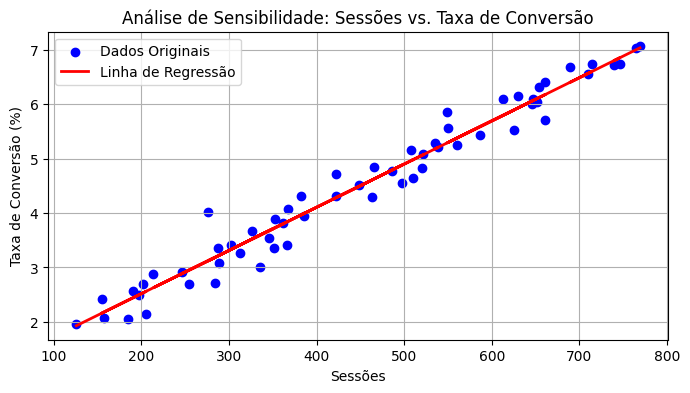

In [81]:
plt.figure(figsize=(8, 4))
plt.scatter(X_sessoes, y, color='blue', label='Dados Originais')
plt.plot(X_sessoes, model_sessoes.predict(X_sessoes), color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Sessões')
plt.ylabel('Taxa de Conversão (%)')
plt.title('Análise de Sensibilidade: Sessões vs. Taxa de Conversão')
plt.legend()
plt.grid(True)
plt.show()

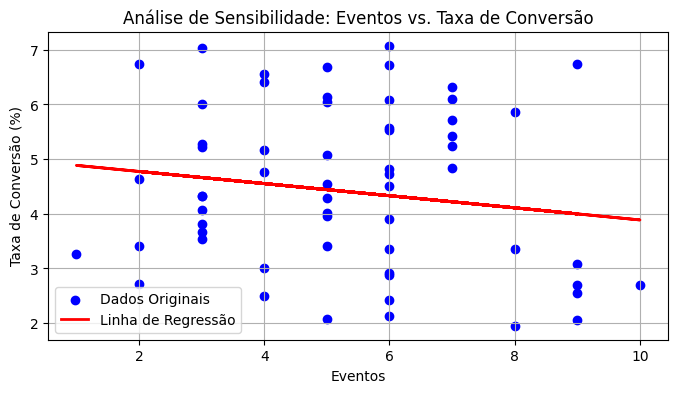

In [82]:
plt.figure(figsize=(8, 4))
plt.scatter(X_eventos, y, color='blue', label='Dados Originais')
plt.plot(X_eventos, model_eventos.predict(X_eventos), color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Eventos')
plt.ylabel('Taxa de Conversão (%)')
plt.title('Análise de Sensibilidade: Eventos vs. Taxa de Conversão')
plt.legend()
plt.grid(True)
plt.show()

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.